Import libraries

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import numpy as np

Load dataset and prepare df

In [28]:
# Load the dfset
file_path = './data/owid-covid-data.csv'
date_column = 'date'
target_column = 'new_deaths'
df = pd.read_csv(file_path).drop(columns=['total_deaths','new_deaths_smoothed', 'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million'])
df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.select_dtypes(exclude=['object'])
correlation_with_target = df.drop(columns=[target_column]).corrwith(df[target_column])
most_corr = correlation_with_target.sort_values(ascending=False).index[:10]
df = df[most_corr].merge(df[target_column], left_index=True, right_index=True)
df

,weekly_icu_admissions_per_million,icu_patients_per_million,icu_patients,weekly_hosp_admissions_per_million,new_tests_smoothed,hosp_patients_per_million,stringency_index,hosp_patients,weekly_icu_admissions,tests_per_case,new_deaths
date,,,,,,,,,,,
2020-01-01,0.000,0.000,0.0,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.0
2020-01-02,0.000,0.000,0.0,0.000,0.0,0.000,0.00,0.0,0.0,0.0,0.0
2020-01-03,0.000,0.000,0.0,0.000,0.0,0.000,25.01,0.0,0.0,0.0,0.0
2020-01-04,0.000,0.000,0.0,0.000,0.0,0.000,25.01,0.0,0.0,0.0,0.0
2020-01-05,0.000,0.000,0.0,0.000,0.0,0.000,27.79,0.0,0.0,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-23,1.525,0.821,10.0,20.371,0.0,12.003,0.00,146.0,16.0,0.0,8.0
2023-09-24,0.000,0.762,8.0,0.000,0.0,11.054,0.00,116.0,0.0,0.0,88.0
2023-09-25,0.740,1.408,18.0,19.813,0.0,26.250,0.00,360.0,13.0,0.0,0.0


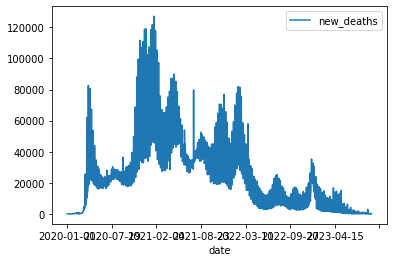

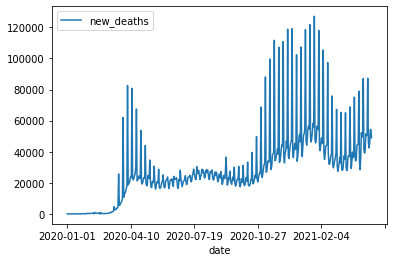

In [31]:
plot_cols = [target_column]
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True)

In [32]:
# Display the first few rows of the dfset
print(df.head())


            weekly_icu_admissions_per_million  icu_patients_per_million  \
date                                                                      
2020-01-01                                0.0                       0.0   
2020-01-02                                0.0                       0.0   
2020-01-03                                0.0                       0.0   
2020-01-04                                0.0                       0.0   
2020-01-05                                0.0                       0.0   

            icu_patients  weekly_hosp_admissions_per_million  \
date                                                           
2020-01-01           0.0                                 0.0   
2020-01-02           0.0                                 0.0   
2020-01-03           0.0                                 0.0   
2020-01-04           0.0                                 0.0   
2020-01-05           0.0                                 0.0   

            new_tests_smo

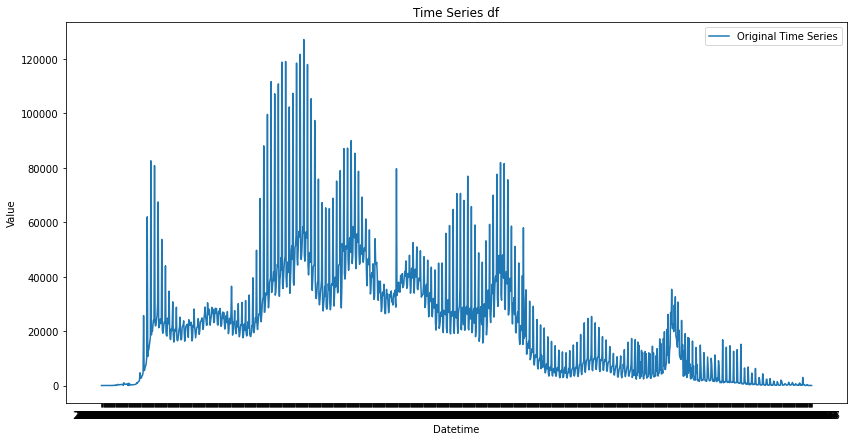

In [33]:
# Plot the entire time series df
plt.figure(figsize=(14, 7))
plt.plot(df[target_column], label='Original Time Series')
plt.title('Time Series df')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.show()


In [34]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(
    df[target_column], model='aditive', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


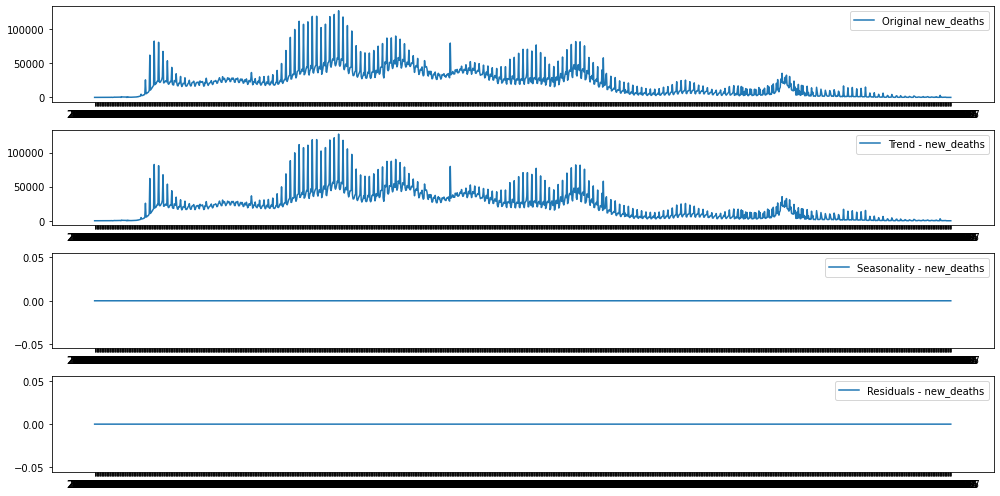

count      1366.000000
mean      21305.585652
std       19948.296074
min           0.000000
25%        4005.000000
50%       19927.000000
75%       32573.250000
max      127161.000000
Name: new_deaths, dtype: float64


In [35]:
# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(df[target_column], label=f'Original new_deaths')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label=f'Trend - new_deaths')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label=f'Seasonality - new_deaths')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label=f'Residuals - new_deaths')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Display summary statistics for the current target_column
print(df[target_column].describe())


In [36]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df,
                        tsmode=True,
                        sortby="date",
                        )
profile.to_file('profile_report.html')


C:\Users\ambro\AppData\Roaming\Python\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\ambro\AppData\Local\Temp\ipykernel_33812\3185812945.py:1: DeprecationWarning: `import pandas_

AttributeError: 'Series' object has no attribute 'mad'